# Tooling Workflow Example
1. New epidemic that we want to investigate
    1. Load up known model (Chime+)
    1. Evaluate Chime+
    1. See how the dynamics match with this new epidemic (don't see this feature)
1. Hypothesize a new disease dynamic
    1. Update Chime+ model
    1. Evaluate updated Chime+
    1. See how dynamics match (start to see this feature)
    1. Parameter estimation to get fit
    1. Sensitivity analysis
1. Expand this disease model to evaluate potential policy options
    1. Multi-generational model (can model effect of interaction policies)

# AlgebraicPetri Application Demo

[AlgebraicPetri.jl](https://algebraicjulia.github.io/AlgebraicPetri.jl/dev/) is a library which simultaneously provides modelers access to the model development/analysis tools contained in [AlgebraicJulia](https://www.algebraicjulia.org/) and the trajectory generation/analysis tools contained in [SciML](https://sciml.ai/).

In [1]:
# Necessary imports 
using AlgebraicPetri
using AlgebraicPetri.ModelComparison
using Semagrams, Semagrams.Examples
using Catlab
using Catlab.CategoricalAlgebra
using DifferentialEquations
using Plots
using JSON
using PrettyTables

include("../src/GrometInterop.jl")
include("../src/ModelStratify.jl")
include("../src/Sensitivity.jl")
using .GrometInterop
using .ModelStratify
using .Sensitivity;

solution(model::LabelledReactionNet, tspan) = solve(ODEProblem(vectorfield(model), concentrations(model), tspan, rates(model)), Tsit5())
default(linewidth=5, xaxis="Time", yaxis="Population")
function sens_table(sens; kw...)
    sens_matrix = hcat(collect(keys(sens)), collect(values(sens)))
    pretty_table(sens_matrix[sortperm(sens_matrix[:, 2]; rev=true), :]; header=(["Transition", "Sensitivity"],), kw...)
end;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10552387943911635757\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13273186225469254924\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10552387943911635757\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
@semagramschema LabelledReactionNetSema(TheoryLabelledReactionNet) begin
  @box S Circle :sname
  @box T Square :tname
  @wire I(is,it)
  @wire O(ot,os)
  @data Name Stringlike
  @data Rate Numeric
  @data Concentration Numeric
end;

In [3]:
p = Semagram{LabelledReactionNet{Float64, Float64}}(LabelledReactionNetSema)

Semagram{Catlab.CSetDataStructures.AttributedCSet{Catlab.Theories.CatDesc{(:T, :S, :I, :O), (:it, :is, :ot, :os), (3, 3, 4, 4), (1, 2, 1, 2)}, Catlab.Theories.AttrDesc{Catlab.Theories.CatDesc{(:T, :S, :I, :O), (:it, :is, :ot, :os), (3, 3, 4, 4), (1, 2, 1, 2)}, (:Rate, :Concentration, :Name), (:rate, :concentration, :tname, :sname), (1, 2, 1, 2), (1, 2, 3, 3)}, Tuple{Float64, Float64, Symbol}, (:is, :it, :os, :ot), (), Tables, Indices} where {Tables<:NamedTuple, Indices<:NamedTuple}}(WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}()), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("sending" => (Observable{Dict{String, Any}} with 2 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:T => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :rate), (Stringlike, :tname)], "<polygon points=\"-40,-40 40,-40 40,40 -40,40\"></polygon>", :tname), :S => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :concentration), (Stringlike, :sname)], "<circle r=\"40\"></circle>", :sname)), "wire_types" => Dict{Symbol, WireProperties}(:I => WireProperties(Tuple{AttributeType, Symbol}[], ("Box", :S), :is, ("Box", :T), :it, "DefaultWire"), :O => WireProperties(Tuple{AttributeType, Symbol}[], ("Box", :T), :ot, ("Box", :S), :os, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), nothing), "receiving" => (Observable{Dict{String, Any}} with 0 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:T => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :rate), (Stringlike, :tname)], "<polygon points=\"-40,-40 40,-40 40,40 -40,40\"></polygon>", :tname), :S => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :concentration), (Stringlike, :sname)], "<circle r=\"40\"></circle>", :sname)), "wire_types" => Dict{Symbol, WireProperties}(:I => WireProperties(Tuple{AttributeType, Symbol}[], ("Box", :S), :is, ("Box", :T), :it, "DefaultWire"), :O => WireProperties(Tuple{AttributeType, Symbol}[], ("Box", :T), :ot, ("Box", :S), :os, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "semagrams", "/Users/abaas3/.julia/packages/Semagrams/71R02/src/../deps/bundles/app.bundle.js")], Dict{Any, Any}("sending" => Any[WebIO.JSString("(function (newls){console.log(this); return this.state.resetWith(newls)})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000014b6c3200, Task (runnable) @0x000000014b6c3200), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("(function (){var semagrams=System.registry.get(System.resolveSync(\"semagrams\")); var scopeobj=this; return setTimeout((function (){return semagrams.main(WebIO.getval({\"name\":\"receiving\",\"scope\":\"11198949701560809326\",\"id\":\"13251599321155905830\",\"type\":\"observable\"}),scopeobj,(function (x){return WebIO.setval({\"name\":\"receiving\",\"scope\":\"11198949701560809326\",\"id\":\"13251599321155905830\",\"type\":\"observable\"},x)}))}),20)})")]), Observable{Dict{String, Any}} with 0 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:T => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :r

In [4]:
load(p, "SVIIR.sema");

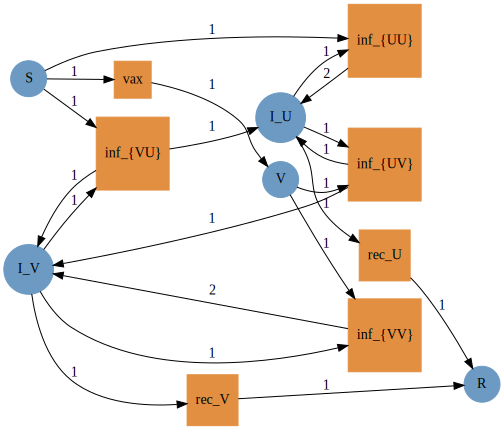

In [5]:
(model = get_acset(p)) |> Graph

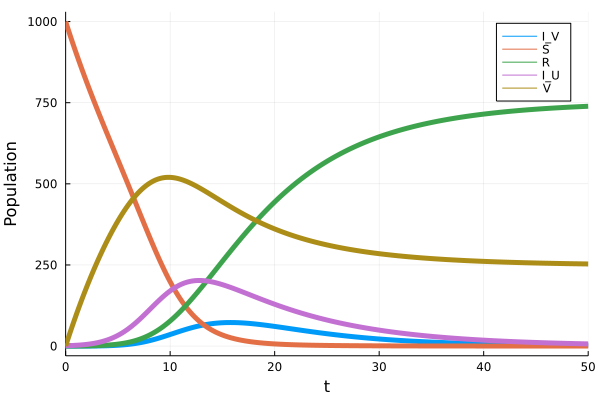

In [6]:
sol = solution(model, (0.0,50.0))
plot(sol)

In [7]:
sens = sensitivity(int_metric(model, [:R, :S, :V], t_range=(0.0,50.0)), rates(model))
sens_table(sens)

┌────────────┬─────────────┐
│ Transition │ Sensitivity │
├────────────┼─────────────┤
│      rec_U │     46931.4 │
│        vax │     44438.5 │
│      rec_V │     5599.98 │
│   inf_{VU} │  -3.76992e5 │
│   inf_{VV} │  -1.47095e6 │
│   inf_{UU} │  -4.73525e6 │
│   inf_{UV} │  -5.10787e6 │
└────────────┴─────────────┘


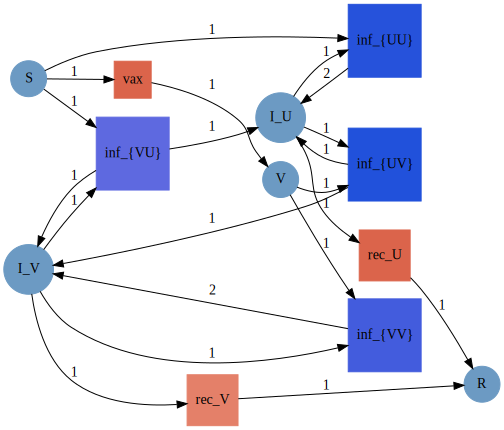

In [8]:
log_sens = log10.(abs.(sens) .+ 1) .* sign.(sens)
max_rng = maximum(abs.(log_sens))
GraphHeatmap(model, log_sens, clims=(-max_rng, max_rng))

## Add a hypothesized transition to the original model

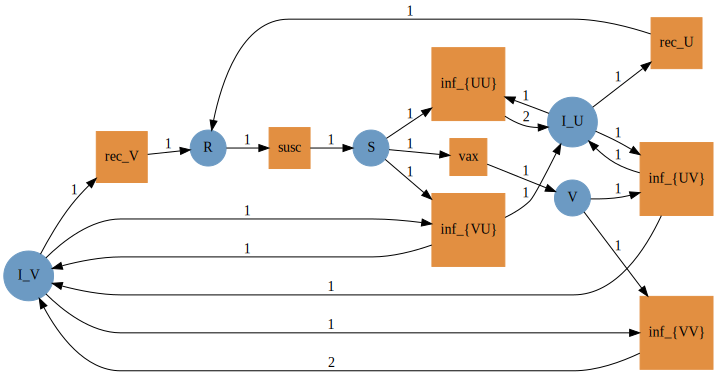

In [9]:
(model_susc = get_acset(p)) |> Graph

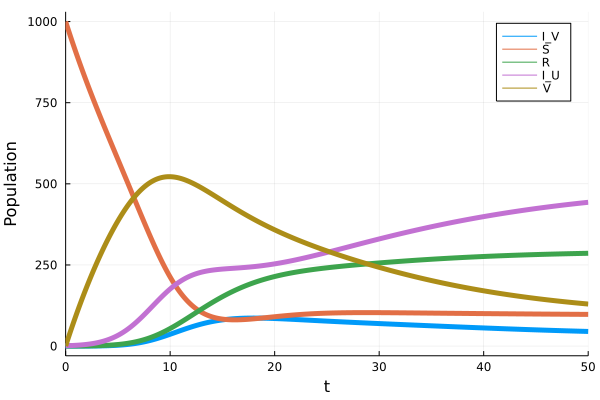

In [10]:
sol = solution(model_susc, (0.0, 50.0))
plot(sol)

In [11]:
sens = sensitivity(int_metric(model_susc, [:R, :S, :V], t_range=(0.0,50.0)), rates(model_susc))
sens_table(sens)

┌────────────┬─────────────┐
│ Transition │ Sensitivity │
├────────────┼─────────────┤
│        vax │   1.26791e5 │
│      rec_U │   1.19472e5 │
│      rec_V │     10535.2 │
│       susc │    -31177.0 │
│   inf_{VU} │  -2.03732e6 │
│   inf_{VV} │  -7.55282e6 │
│   inf_{UU} │  -1.94437e7 │
│   inf_{UV} │  -3.30482e7 │
└────────────┴─────────────┘


In [12]:
# booster shots
# How interventions can impact rates ($$)

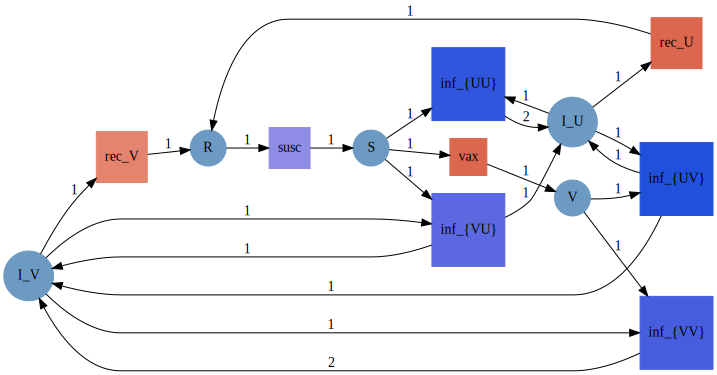

In [13]:
log_sens = log10.(abs.(sens) .+ 1) .* sign.(sens)
max_rng = maximum(abs.(log_sens))
GraphHeatmap(model_susc, log_sens, clims=(-max_rng, max_rng))

## Hypothesized stratification of model

In [14]:
@semagramschema ScaleGraphSchema(ModelStratify.TheoryScaleGraph) begin
  @box V Circle :node_label
  @wire E(src,tgt)
  @data Scale Numeric
  @data Label Stringlike
end;

In [15]:
gen_graph = Semagram{ModelStratify.ScaleGraph{Float64, Symbol}}(ScaleGraphSchema)

Semagram{Catlab.CSetDataStructures.AttributedCSet{Catlab.Theories.CatDesc{(:V, :E), (:src, :tgt), (2, 2), (1, 1)}, Catlab.Theories.AttrDesc{Catlab.Theories.CatDesc{(:V, :E), (:src, :tgt), (2, 2), (1, 1)}, (:Scale, :Label), (:edge_scale, :conc_scale, :rate_scale, :node_label), (2, 1, 1, 1), (1, 1, 1, 2)}, Tuple{Float64, Symbol}, (:src, :tgt), (), Tables, Indices} where {Tables<:NamedTuple, Indices<:NamedTuple}}(WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}()), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("sending" => (Observable{Dict{String, Any}} with 2 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:V => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :conc_scale), (Numeric, :rate_scale), (Stringlike, :node_label)], "<circle r=\"40\"></circle>", :node_label)), "wire_types" => Dict{Symbol, WireProperties}(:E => WireProperties(Tuple{AttributeType, Symbol}[(Numeric, :edge_scale)], ("Box", :V), :src, ("Box", :V), :tgt, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), nothing), "receiving" => (Observable{Dict{String, Any}} with 0 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:V => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :conc_scale), (Numeric, :rate_scale), (Stringlike, :node_label)], "<circle r=\"40\"></circle>", :node_label)), "wire_types" => Dict{Symbol, WireProperties}(:E => WireProperties(Tuple{AttributeType, Symbol}[(Numeric, :edge_scale)], ("Box", :V), :src, ("Box", :V), :tgt, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "semagrams", "/Users/abaas3/.julia/packages/Semagrams/71R02/src/../deps/bundles/app.bundle.js")], Dict{Any, Any}("sending" => Any[WebIO.JSString("(function (newls){console.log(this); return this.state.resetWith(newls)})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000155a1ea90, Task (runnable) @0x0000000155a1ea90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("(function (){var semagrams=System.registry.get(System.resolveSync(\"semagrams\")); var scopeobj=this; return setTimeout((function (){return semagrams.main(WebIO.getval({\"name\":\"receiving\",\"scope\":\"4211985881495690930\",\"id\":\"12455249568216924780\",\"type\":\"observable\"}),scopeobj,(function (x){return WebIO.setval({\"name\":\"receiving\",\"scope\":\"4211985881495690930\",\"id\":\"12455249568216924780\",\"type\":\"observable\"},x)}))}),20)})")]), Observable{Dict{String, Any}} with 0 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:V => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :conc_scale), (Numeric, :rate_scale), (Stringlike, :node_label)], "<circle r=\"40\"></circle>", :node_label)), "wire_types" => Dict{Symbol, WireProperties}(:E => WireProperties(Tuple{AttributeType, Symbol}[(Numeric, :edge_scale)], ("Box", :V), :src, ("Box", :V), :tgt, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), Observable{Dict{String, Any}} with 2 listeners. Value

In [16]:
load(gen_graph, "gen_graph.sema");

In [17]:
# Add a death transition
load(p, "SVIIRD.sema");

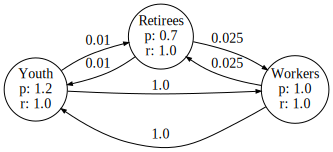

In [18]:
model_death = get_acset(p)
(generations = get_acset(gen_graph)) |> ModelStratify.show_graph

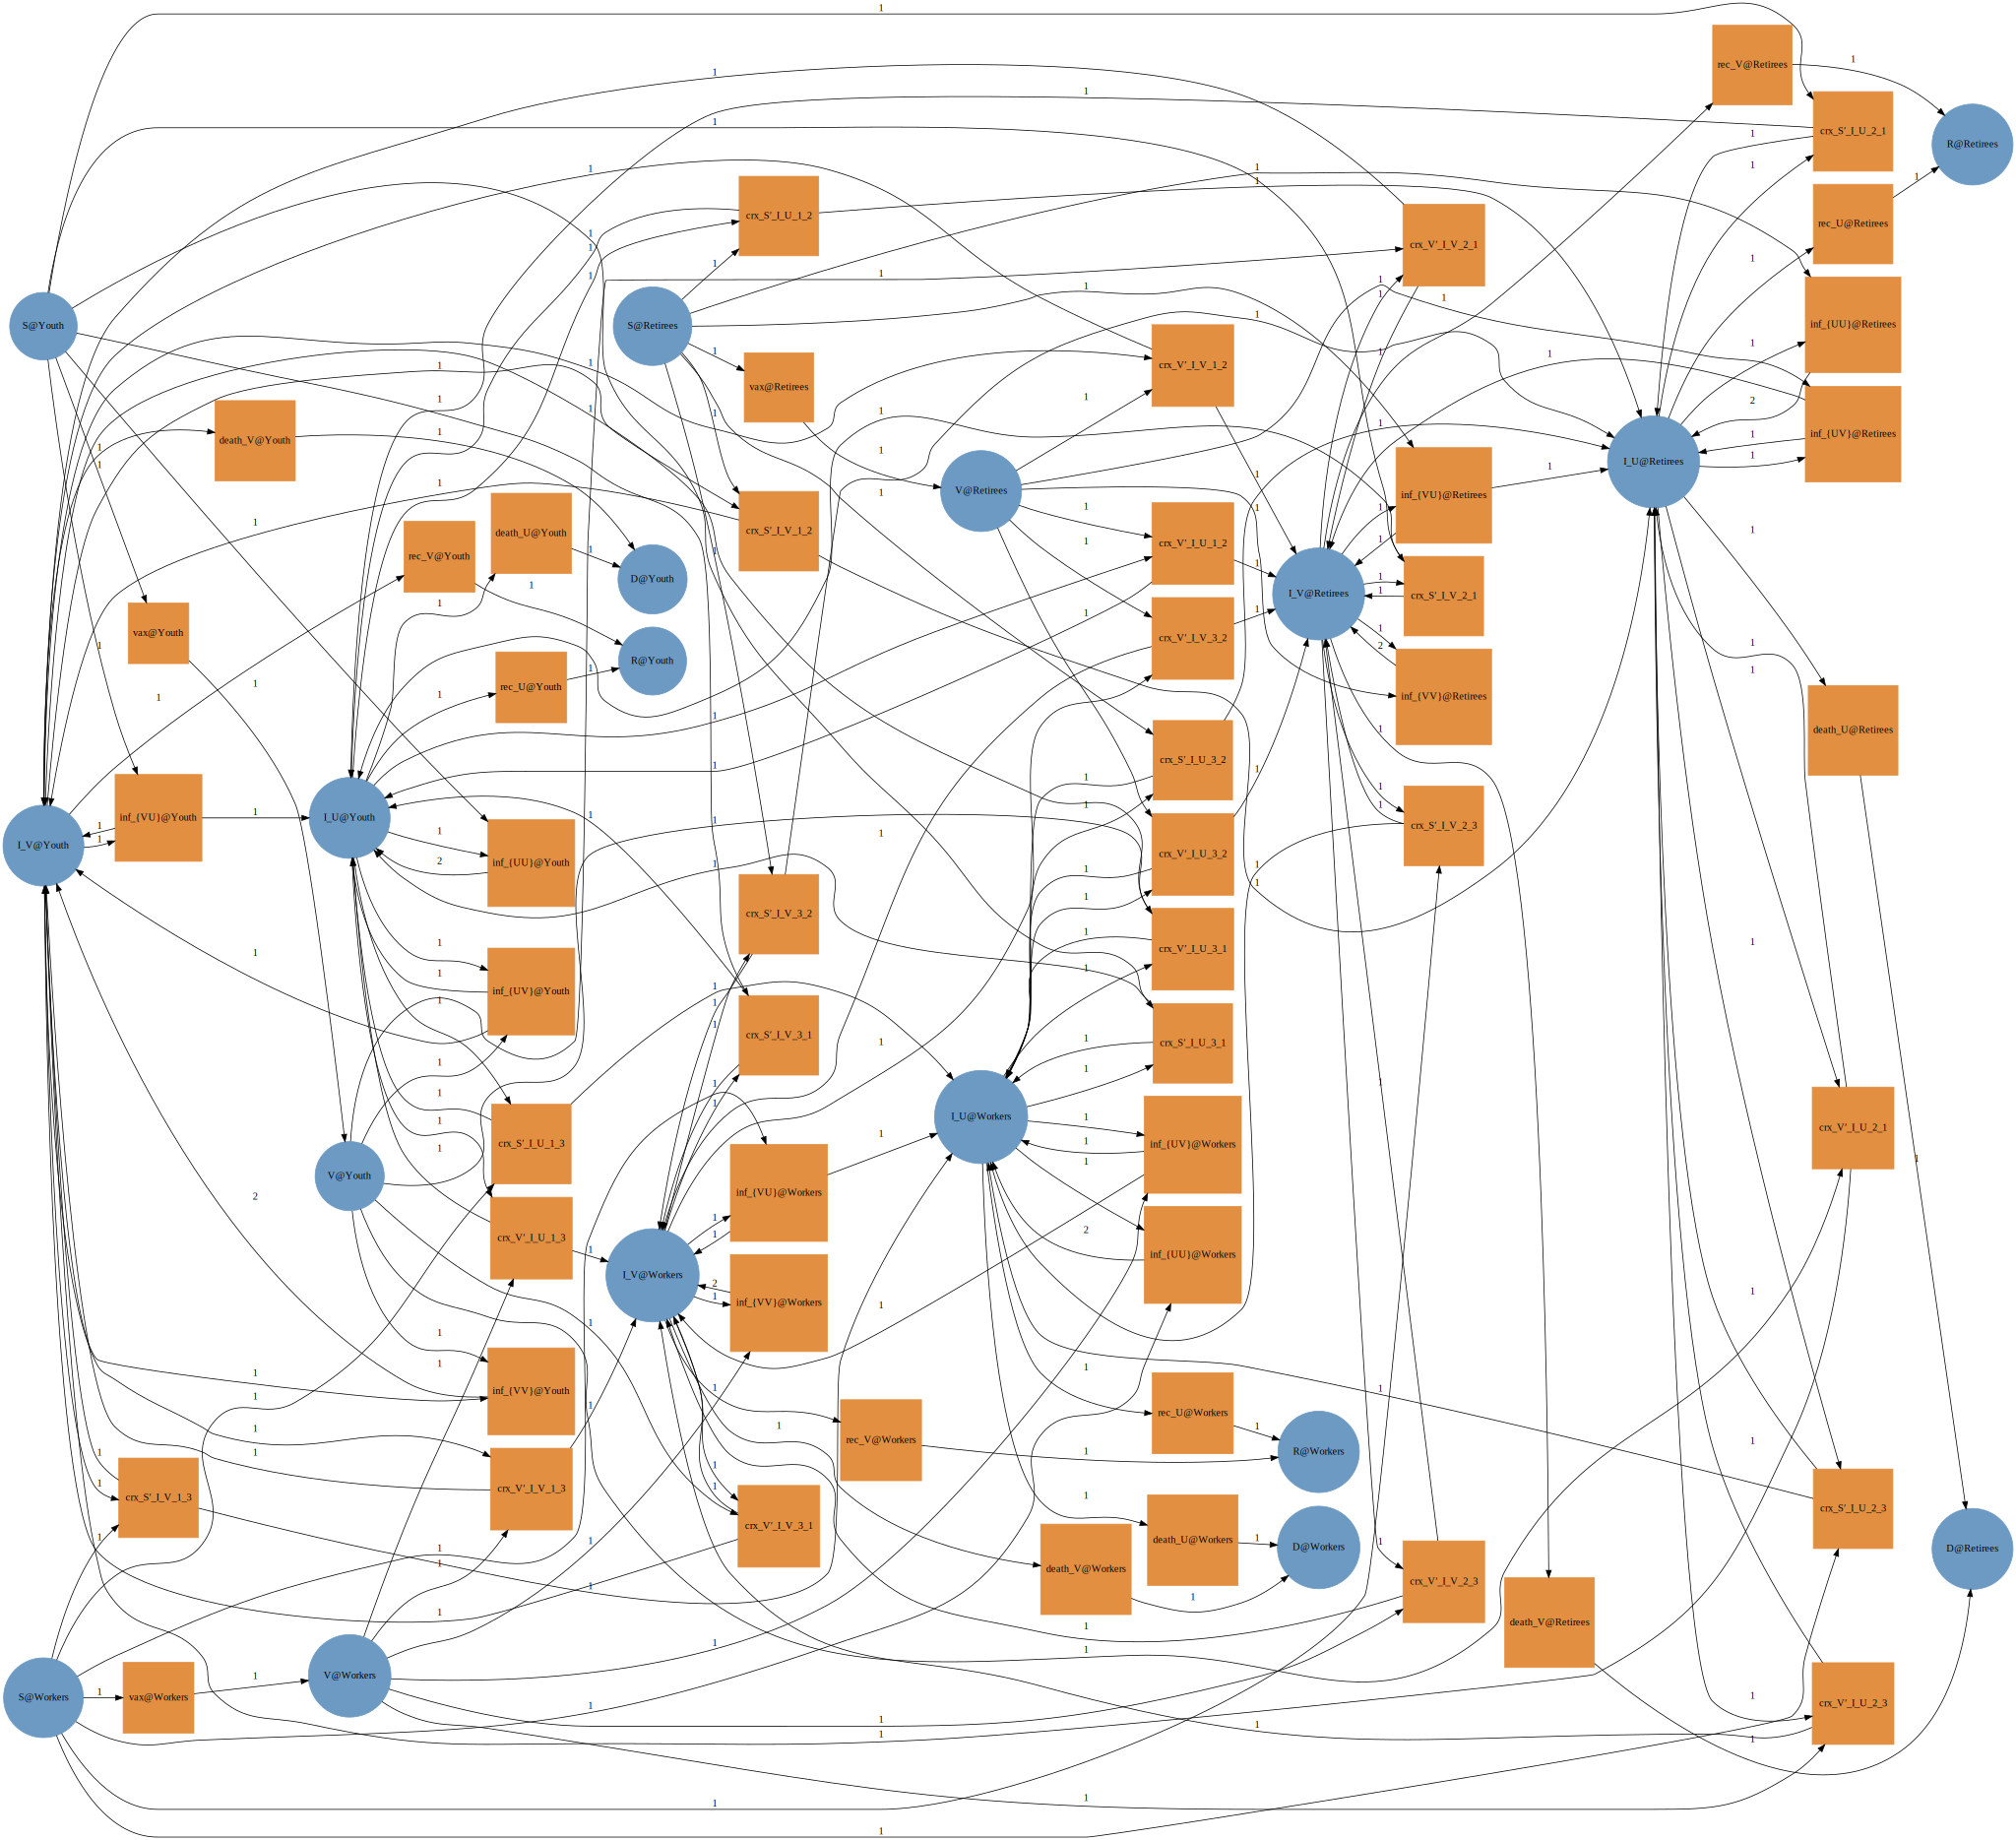

In [19]:
(strat_model = dem_strat(model_death, generations)) |> Graph

In [20]:
# Change some of the initial conditions and rates for different populations

strat_model[:death_V, :Youth] *= 0.1
strat_model[:death_U, :Youth] *= 0.1
strat_model[:death_V, :Retirees] *= 1.5
strat_model[:death_U, :Retirees] *= 1.5
strat_model[Symbol("inf_{UU}"), :Retirees] *= 0.5
strat_model[Symbol("inf_{UV}"), :Retirees] *= 0.5
strat_model[Symbol("inf_{VU}"), :Retirees] *= 0.5
strat_model[Symbol("inf_{VV}"), :Retirees] *= 0.5

strat_model[:I_U, :Retirees] = 0.0
strat_model[:I_U, :Youth] = 0.0

0.0

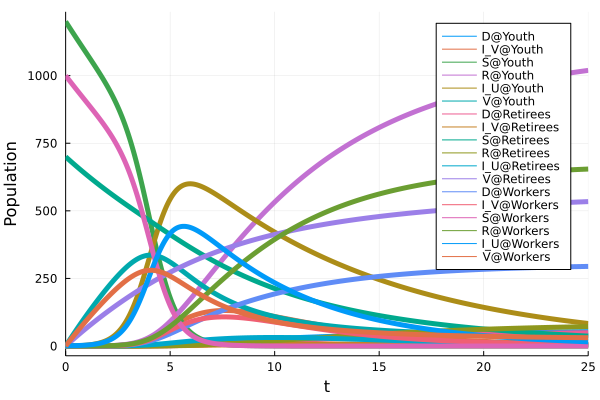

In [21]:
sol = solution(strat_model, (0.0,25.0))
plot(sol)

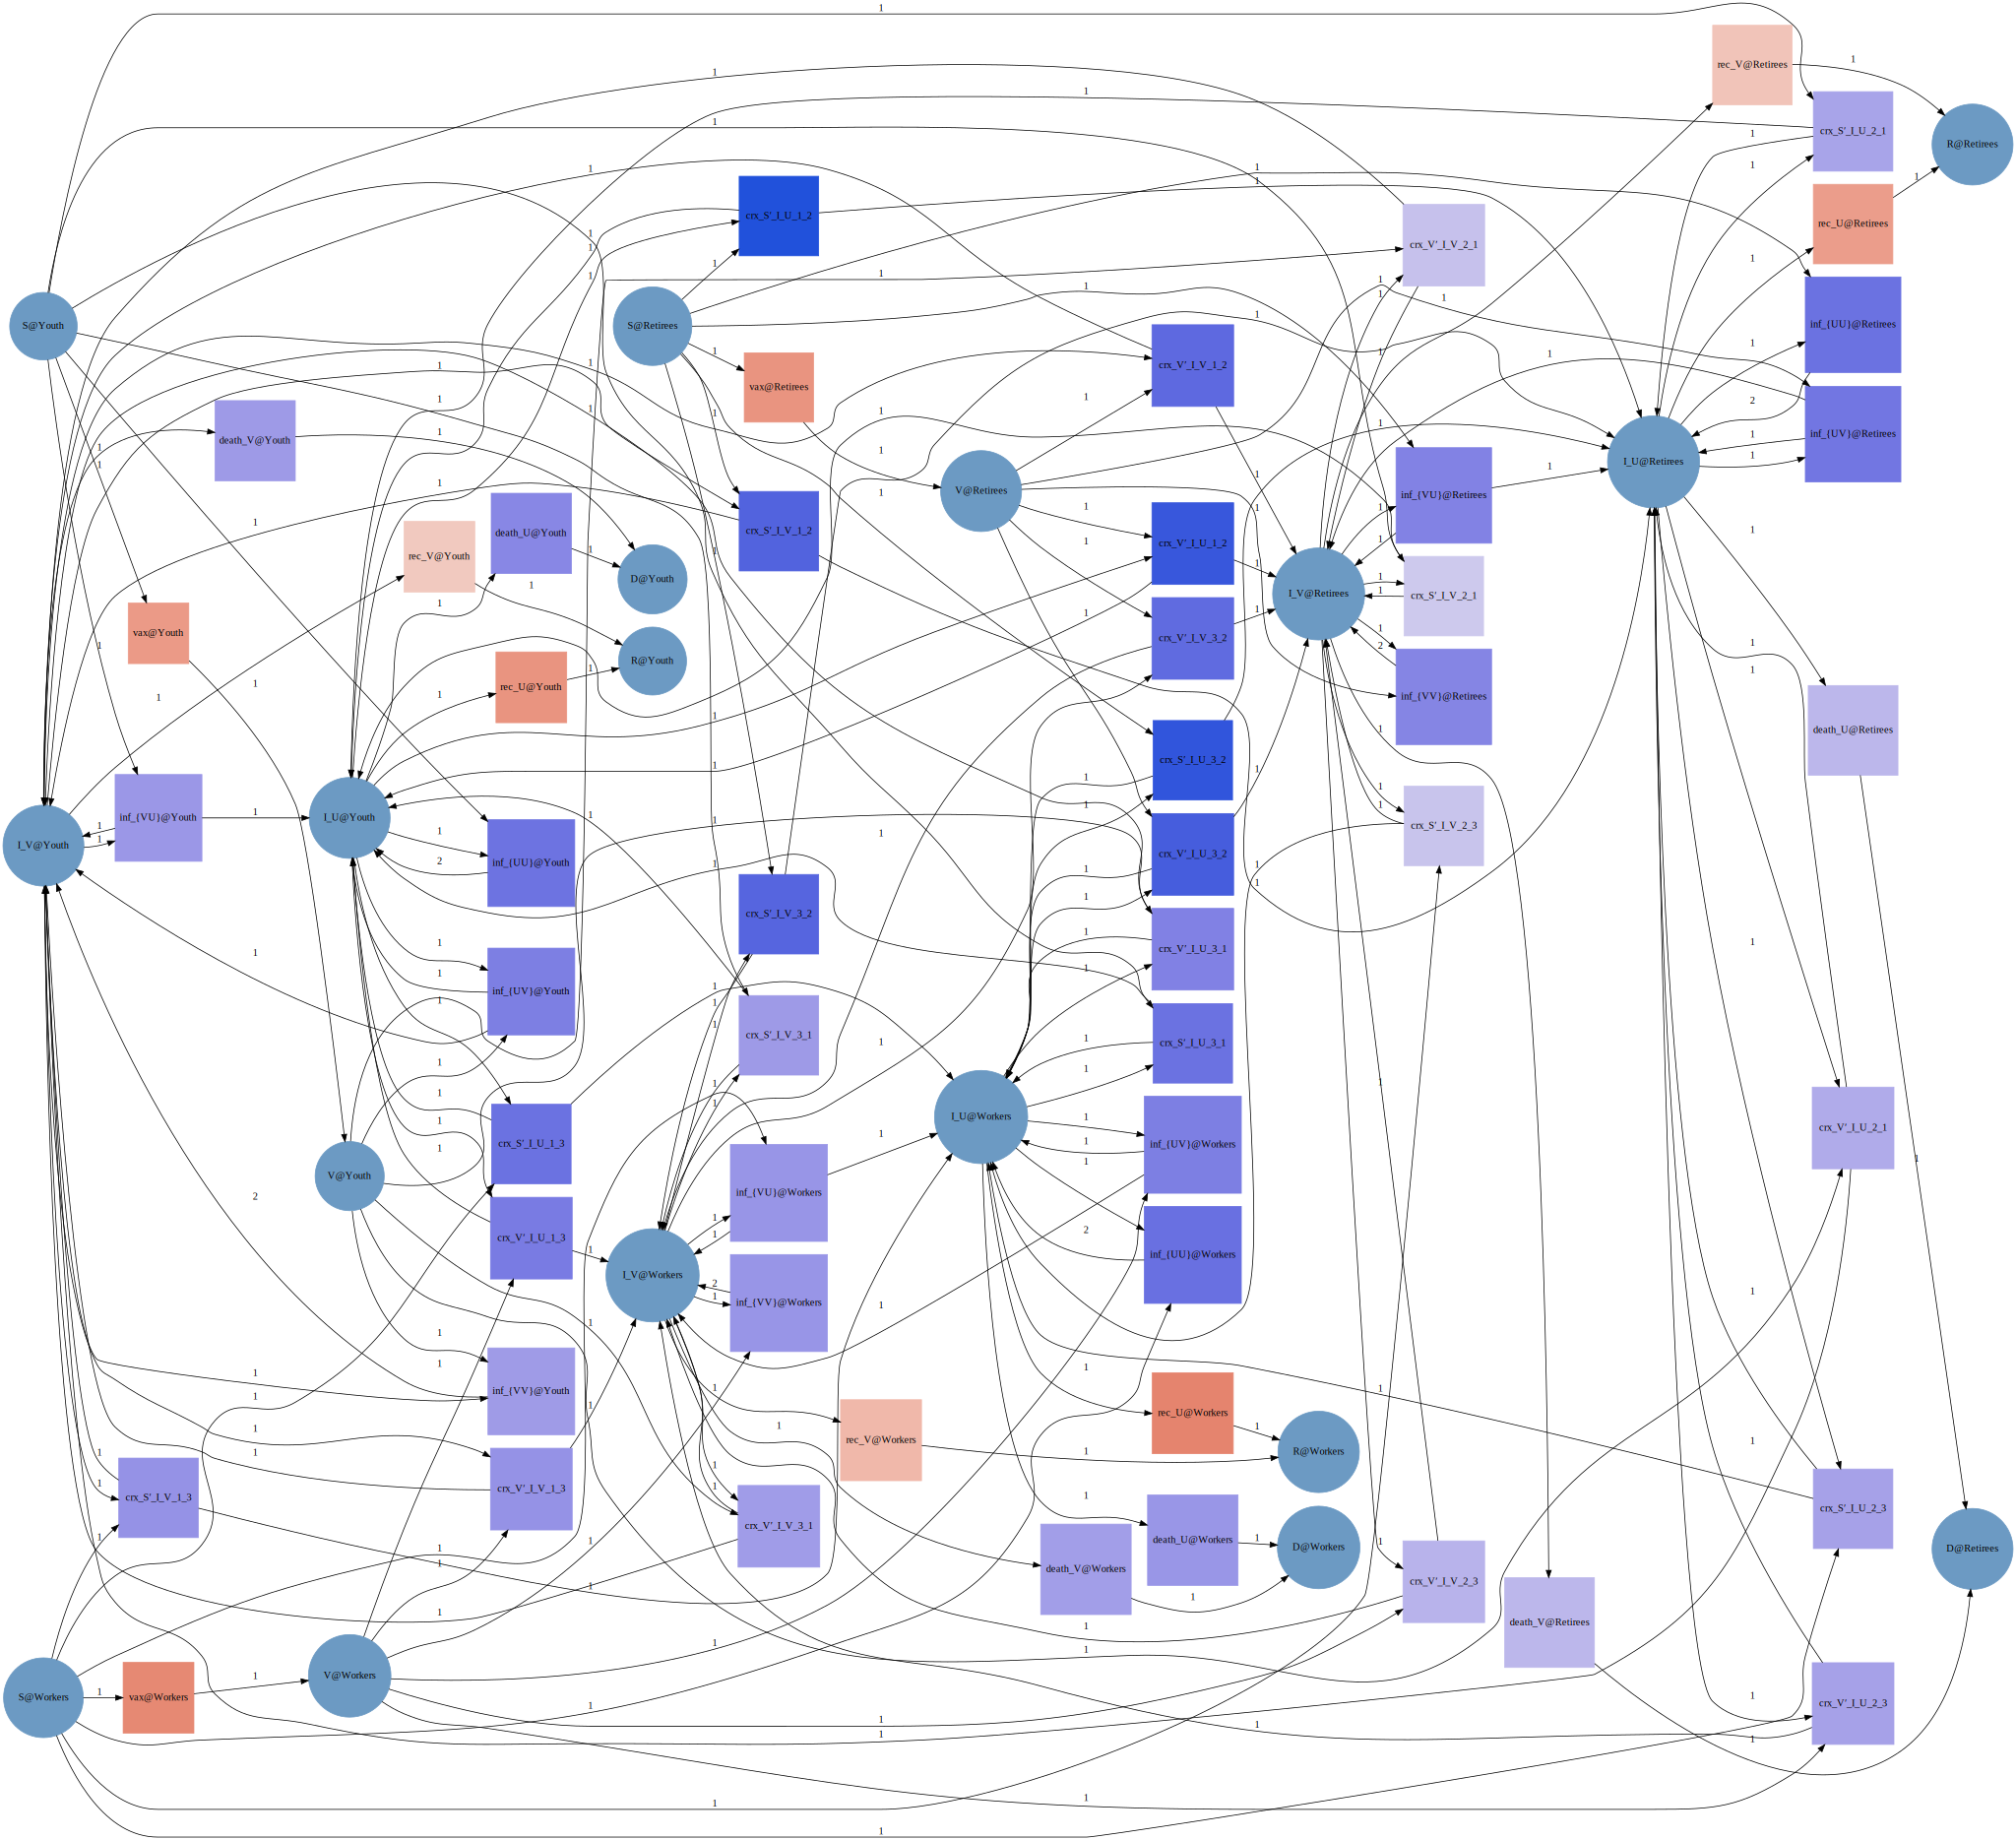

In [22]:
sens = sensitivity(final_metric(strat_model, vcat([[Symbol(:D, "@$i")] for i in [:Youth, :Workers, :Retirees]]...), t_range=(0.0,50.0)), rates(strat_model))
sens *= -1
log_sens = log10.(abs.(sens) .+ 1) .* sign.(sens)
max_rng = maximum(abs.(log_sens))
GraphHeatmap(strat_model, log_sens, clims=(-max_rng, max_rng))

In [23]:
vax_vals = Highlighter((data, i, j)->(startswith("$(data[i,1])", "vax")), crayon"fg:black bold bg:yellow")
sens_table(sens; highlighters=(vax_vals,))

┌───────────────────┬─────────────┐
│        Transition │ Sensitivity │
├───────────────────┼─────────────┤
│     rec_U@Workers │     1741.34 │
│       vax@Workers │     1289.06 │
│       rec_U@Youth │     641.213 │
│      vax@Retirees │     626.418 │
│         vax@Youth │     410.377 │
│    rec_U@Retirees │     312.064 │
│     rec_V@Workers │     46.3704 │
│    rec_V@Retirees │     19.8635 │
│       rec_V@Youth │     12.9789 │
│    crx_S′_I_V_2_1 │    -21.2229 │
│    crx_S′_I_V_2_3 │    -34.2959 │
│    crx_V′_I_V_2_1 │    -42.4772 │
│  death_V@Retirees │    -108.307 │
│  death_U@Retirees │    -110.033 │
│    crx_V′_I_V_2_3 │    -151.882 │
│    crx_V′_I_U_2_1 │    -298.207 │
│    crx_S′_I_U_2_1 │    -571.279 │
│    crx_S′_I_U_2_3 │    -670.752 │
│    crx_V′_I_U_2_3 │    -681.638 │
│   death_V@Workers │    -982.417 │
│    crx_V′_I_V_3_1 │    -1013.32 │
│    inf_{VV}@Youth │    -1230.88 │
│     death_V@Youth │    -1258.31 │
│    crx_S′_I_V_3_1 │     -1368.6 │
│    inf_{VU}@Youth │    -16